# Import Libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load dataset

In [29]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 
  
  
# variable information 
print(wine.variables) 


                            name     role         type demographic  \
0                          class   Target  Categorical        None   
1                        Alcohol  Feature   Continuous        None   
2                      Malicacid  Feature   Continuous        None   
3                            Ash  Feature   Continuous        None   
4              Alcalinity_of_ash  Feature   Continuous        None   
5                      Magnesium  Feature      Integer        None   
6                  Total_phenols  Feature   Continuous        None   
7                     Flavanoids  Feature   Continuous        None   
8           Nonflavanoid_phenols  Feature   Continuous        None   
9                Proanthocyanins  Feature   Continuous        None   
10               Color_intensity  Feature   Continuous        None   
11                           Hue  Feature   Continuous        None   
12  0D280_0D315_of_diluted_wines  Feature   Continuous        None   
13                  

In [30]:
df=pd.concat([X,y],axis=1)
df.head(2)

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1


# Data Cleaning

## Handling duplicates

In [31]:
df.duplicated().sum()

0

### Observation
- No duplicates present

## Handling missing values

In [32]:
df.isna().sum()

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
class                           0
dtype: int64

### Observation
- No missing values

# EDA

<AxesSubplot:>

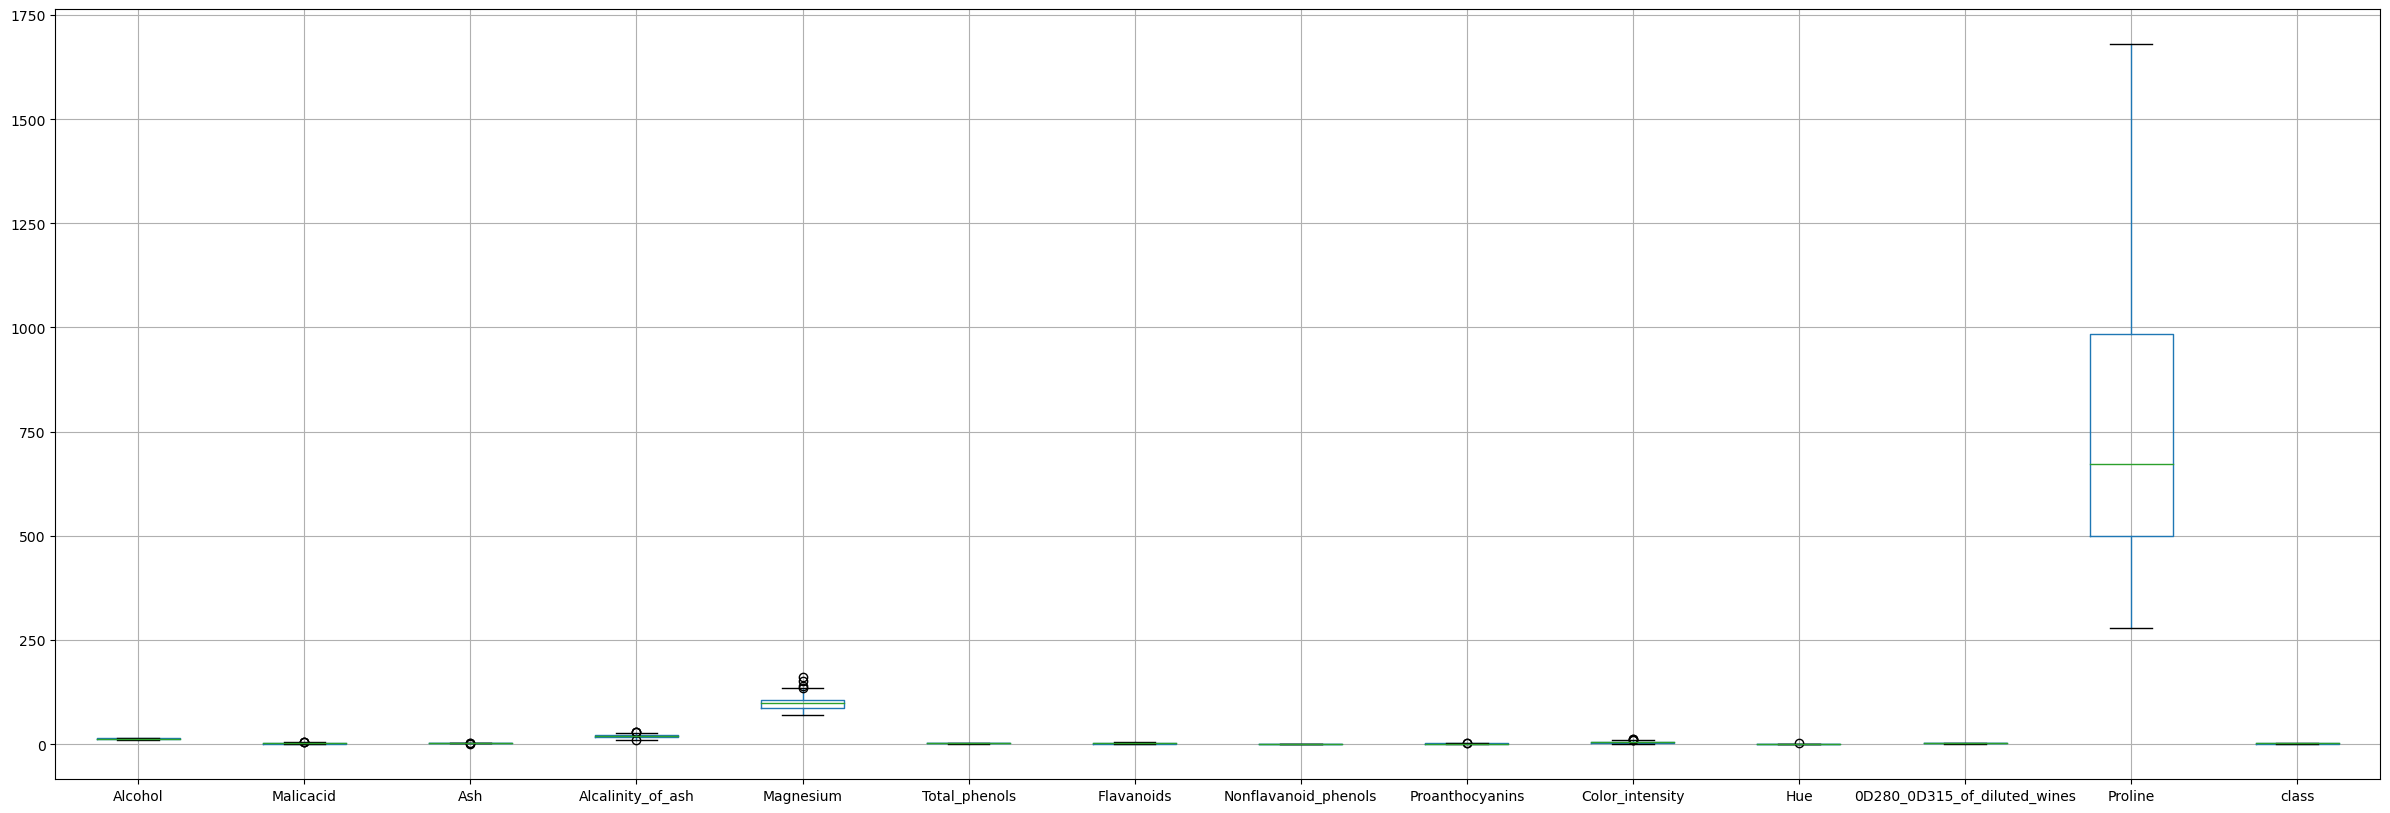

In [33]:
df.boxplot(figsize=(30,10))

### Observation
- Proline feature is way off the scale when compared to others. Hence important to scale it down.
-Let's use unit vectorization for it.

# Splitting dataset

In [34]:
X=df.drop('class',axis=1)
y=df['class']
print(X.shape,y.shape)

(178, 13) (178,)


In [35]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
#Normalization
from sklearn.preprocessing import  Normalizer
scaler=Normalizer()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [37]:
X_train

array([[2.14668003e-02, 2.51493894e-03, 4.04186616e-03, ...,
        8.53282856e-04, 2.93409544e-03, 9.88011728e-01],
       [2.38810091e-02, 1.05015451e-02, 5.03159330e-03, ...,
        1.56284337e-03, 3.22098207e-03, 9.81541875e-01],
       [1.85662888e-02, 1.60597648e-03, 3.15191645e-03, ...,
        1.56094910e-03, 4.15752789e-03, 9.90602314e-01],
       ...,
       [9.27438445e-03, 1.20605695e-03, 1.53498157e-03, ...,
        7.73940288e-04, 1.93485072e-03, 9.97738021e-01],
       [2.52769066e-02, 3.04757030e-03, 4.50163979e-03, ...,
        1.91220097e-03, 4.10326459e-03, 9.85978626e-01],
       [2.74502920e-02, 5.45001746e-03, 5.47226243e-03, ...,
        1.77959754e-03, 7.51879960e-03, 9.74329652e-01]])

## Applying PCA

In [38]:
from sklearn.decomposition import PCA
pca=PCA()
parameters={
    'n_components':np.arange(2,8,1)
}

In [39]:
from sklearn.model_selection import GridSearchCV
gridcv=GridSearchCV(pca,param_grid=parameters,cv=5,verbose=3)
gridcv.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ...................n_components=2;, score=56.888 total time=   0.0s
[CV 2/5] END ...................n_components=2;, score=60.607 total time=   0.0s
[CV 3/5] END ...................n_components=2;, score=60.241 total time=   0.0s
[CV 4/5] END ...................n_components=2;, score=60.045 total time=   0.0s
[CV 5/5] END ...................n_components=2;, score=58.564 total time=   0.0s
[CV 1/5] END ...................n_components=3;, score=58.892 total time=   0.0s
[CV 2/5] END ...................n_components=3;, score=61.483 total time=   0.0s
[CV 3/5] END ...................n_components=3;, score=62.228 total time=   0.0s
[CV 4/5] END ...................n_components=3;, score=61.740 total time=   0.0s
[CV 5/5] END ...................n_components=3;, score=61.250 total time=   0.0s
[CV 1/5] END ...................n_components=4;, score=59.627 total time=   0.0s
[CV 2/5] END ...................n_components=4;, 

GridSearchCV(cv=5, estimator=PCA(),
             param_grid={'n_components': array([2, 3, 4, 5, 6, 7])}, verbose=3)

In [40]:
gridcv.best_params_

{'n_components': 7}

In [41]:
gridcv.best_score_

65.14283255345704

In [42]:
# Let's take 7 pc components 
pca=PCA(n_components=7)
X_7=pca.fit_transform(X_train)
X_7

array([[-5.24341600e-03, -9.07731856e-03,  1.00227782e-02,
         2.23504743e-03,  4.65660464e-03, -1.52399320e-03,
         1.99178896e-03],
       [ 3.28532595e-02, -9.29069287e-03,  2.52253373e-03,
        -3.94441192e-03, -3.18926906e-03,  2.98169069e-03,
        -3.73130479e-04],
       [-2.23775626e-02, -1.83483059e-03, -1.77053557e-03,
         1.74805793e-03,  1.42687429e-03, -1.73628416e-03,
         2.70247085e-03],
       [-1.02706070e-02, -8.87268662e-03,  9.60538177e-03,
         2.60090663e-03,  3.93870511e-03, -1.60534710e-03,
         1.57911586e-03],
       [-6.16483891e-02,  2.24335734e-03, -2.42901179e-03,
         6.61580620e-04,  3.66066377e-05,  1.05437472e-04,
        -7.26804458e-04],
       [ 1.35439033e-01,  4.53357246e-03, -4.06865396e-03,
         4.81645713e-03,  2.68190263e-03,  7.38885568e-04,
        -2.29840330e-03],
       [ 6.22146222e-02,  7.37389566e-03, -2.80904501e-03,
         9.06155918e-04, -1.55160955e-04, -2.87172494e-03,
        -4.0218959

In [43]:
pca.explained_variance_ratio_

array([9.74927940e-01, 1.53809497e-02, 4.59805923e-03, 1.77272514e-03,
       1.32781572e-03, 9.37040794e-04, 6.94323640e-04])

### Observation
- By gridsearch cv it is found that 7 features are optimal

## Visualising pca


In [44]:
# In order to visualize pca, we need atmost 3 features
pca=PCA(3)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [75]:
import plotly.express as px
plt.figure(figsize=(20,10))
pc1=X_train[:,0]
pc3=X_train[:,1]
pc2=X_train[:,2]
px.scatter_3d(x=pc1,y=pc2,z=pc3)

<Figure size 2000x1000 with 0 Axes>

# Model training

In [77]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()
classifier.fit(X_train,y_train)
print(confusion_matrix(y_test,classifier.predict(X_test)))
print(accuracy_score(y_test,classifier.predict(X_test)))
print(classification_report(y_test,classifier.predict(X_test)))

[[12  1  1]
 [ 1 12  1]
 [ 0  3  5]]
0.8055555555555556
              precision    recall  f1-score   support

           1       0.92      0.86      0.89        14
           2       0.75      0.86      0.80        14
           3       0.71      0.62      0.67         8

    accuracy                           0.81        36
   macro avg       0.80      0.78      0.79        36
weighted avg       0.81      0.81      0.80        36



### Observation
- The model accuracy is 80 %